<a href="https://colab.research.google.com/github/premkumar25/Liver_Disease_prediction/blob/main/Liver_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

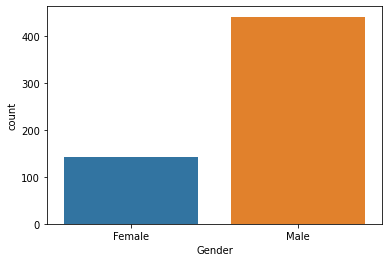

In [ ]:
sns.countplot(df['Gender'])

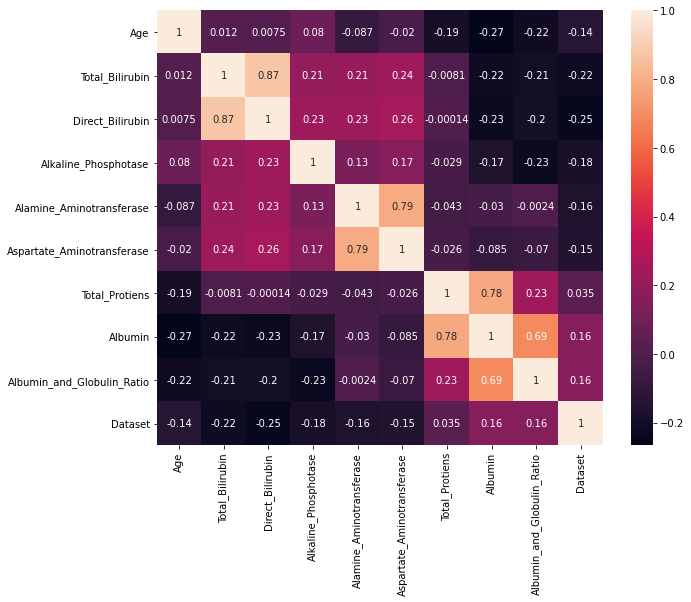

In [ ]:
df_corr = df.corr()
df_corr_index = df_corr.index
plt.figure(figsize=(10,8))
sns.heatmap(df_corr[df_corr_index],annot=True)

In [ ]:
df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

In [4]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Fill the missing values

In [5]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

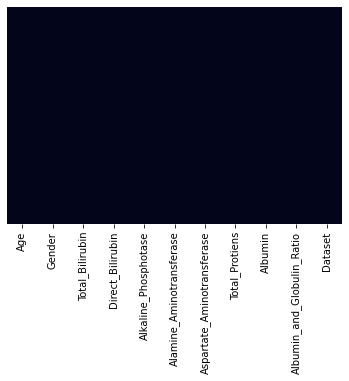

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)         ##Check Null values are present or not

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43f5c97748>,
      dtype=object)

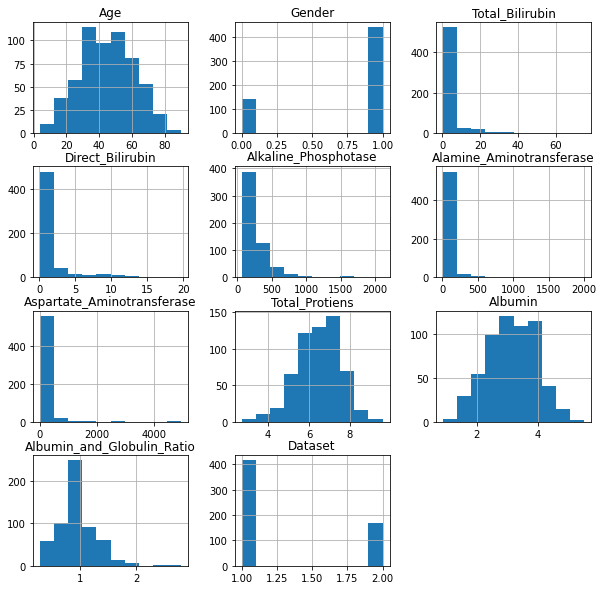

In [ ]:
df.hist(figsize=(10,10))

In [7]:
X=df.drop('Dataset',axis=1)
y=df['Dataset']

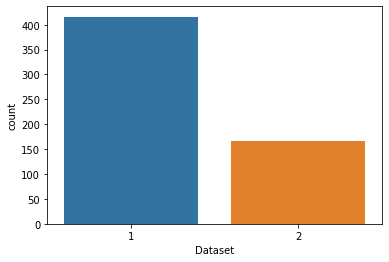

In [ ]:
sns.countplot(df['Dataset'])

Use Over Sampling to reduce the imbalance in dataset

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [8]:
scale = StandardScaler()
X,y = SMOTE().fit_sample(X,y)
X=scale.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

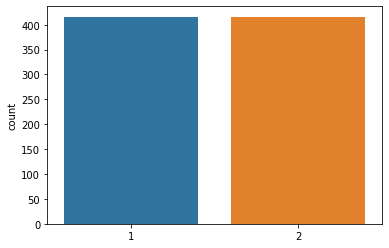

In [ ]:
sns.countplot(y)

## Import Models

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
clf = [KNeighborsClassifier(),LogisticRegression(),RandomForestClassifier(),XGBClassifier()]

for i in (clf):
  score=cross_val_score(i,X,y,cv=10)
  print(i,'\nAccuracy is',score.mean()*100)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 
Accuracy is 68.14830751577739
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
Accuracy is 70.78456683878372
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
  

In [ ]:
param={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

est = RandomizedSearchCV(RandomForestClassifier(),param,cv=10,scoring='accuracy')

In [ ]:
mdl = est.fit(X,y)
mdl.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
classifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
scr=cross_val_score(classifier,X_train,y_train,cv=10)
scr.mean()*100

78.6461038961039

#### Find the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)

In [ ]:
print(acc_score)
print(cm)

0.8072727272727273
[[116  30]
 [ 23 106]]


# Droping features with same corelation and less corelation to the dependent feature

In [17]:
source = pd.DataFrame(X,columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'])
target = pd.DataFrame(y,columns=['Dataset'])
source.drop(['Alamine_Aminotransferase','Albumin_and_Globulin_Ratio', 'Total_Protiens'],axis=1,inplace=True)

In [14]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [20]:
X_train,X_test,y_train,y_test = train_test_split(source,target,test_size=0.33)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
acc_score = accuracy_score(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
print(acc_score)
print(cm)

0.7927272727272727
[[104  27]
 [ 30 114]]
